In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import apogee.tools.read as apread
from apogee.tools import path
from astropy.io import fits
from astropy.io.fits import getdata, getheader
from astropy.time import Time
%matplotlib notebook

In [2]:
targetInfoFile = '/Users/Meredith/Downloads/visits_search_29369.csv'
plates, mjds, fibers, locs = np.loadtxt(targetInfoFile, delimiter=',', usecols=(0,1,2,4), unpack=True)

In [4]:
filepaths = []
for plate, mjd, fiber in zip(plates, mjds, fibers):
    plate = int(plate)
    mjd = int(mjd)
    fiber = int(fiber)
    spec = apread.apVisit(plate, mjd, fiber, ext=1, header=False)
    specerr = apread.apVisit(plate, mjd, fiber, ext=2, header=False)
    wave = apread.apVisit(plate, mjd, fiber, ext=4, header=False)
    filepath = path.apVisitPath(plate, mjd, fiber)
    filepaths.append(filepath)

In [7]:
dates = []
jdmids = []
for file in filepaths:
    dates.append(Time(getheader(file, ext=0)['DATE-OBS']))
    jdmids.append(getheader(file, ext=0)['JD-MID'])

In [8]:
[date.jd for date in dates]

[2456557.707701782,
 2456559.6977056595,
 2456560.695469896,
 2456584.6076405556,
 2456585.6061890624,
 2456757.869895127,
 2456758.8791995253,
 2456760.8825331135,
 2456761.8495853124,
 2456762.8453364237,
 2456763.8578102547,
 2456783.8230246413,
 2456784.797678704,
 2456785.801105845,
 2456786.774086574,
 2456787.784930324,
 2456788.8186177085,
 2456812.7080265624,
 2456814.729920301,
 2456815.7599358796,
 2456816.740649352,
 2456817.7363223033,
 2456818.7388858795,
 2456819.736483831,
 2456820.730248322]

In [9]:
[jdmid for jdmid in jdmids]

[2456557.73097,
 2456559.72097,
 2456560.71874,
 2456584.63091,
 2456585.62946,
 2456757.89316,
 2456758.90247,
 2456760.9058,
 2456761.87286,
 2456762.8686,
 2456763.88108,
 2456783.83465,
 2456784.82095,
 2456785.82438,
 2456786.79735,
 2456787.8082,
 2456788.84189,
 2456812.74399,
 2456814.75319,
 2456815.7832,
 2456816.76392,
 2456817.75959,
 2456818.76215,
 2456819.75975,
 2456820.75351]

In [10]:
paper_dates = [2456557.733, 2456559.723, 2456560.720, 2456584.632, 2456585.630, 2456757.892, 2456760.905,
               2456762.868, 2456763.880, 2456783.835, 2456784.821, 2456785.825, 2456786.798, 2456787.809, 
               2456788.842, 2456812.751, 2456814.755, 2456815.785, 2456817.761, 2456818.764, 2456819.762, 
               2456820.755]

In [11]:
print(len(dates), len(paper_dates))

25 22


In [12]:
dates_jd = [date.jd for date in dates]
print(len(dates_jd))
print([date.jd for date in dates])
dates_jd_trunc = np.delete(dates_jd, [6,8,20])
jdmids_trunc = np.delete(jdmids, [6,8,20])
print(len(dates_jd_trunc))
print(dates_jd_trunc)
print(len(jdmids_trunc))
print(jdmids_trunc)

25
[2456557.707701782, 2456559.6977056595, 2456560.695469896, 2456584.6076405556, 2456585.6061890624, 2456757.869895127, 2456758.8791995253, 2456760.8825331135, 2456761.8495853124, 2456762.8453364237, 2456763.8578102547, 2456783.8230246413, 2456784.797678704, 2456785.801105845, 2456786.774086574, 2456787.784930324, 2456788.8186177085, 2456812.7080265624, 2456814.729920301, 2456815.7599358796, 2456816.740649352, 2456817.7363223033, 2456818.7388858795, 2456819.736483831, 2456820.730248322]
22
[2456557.70770178 2456559.69770566 2456560.6954699  2456584.60764056
 2456585.60618906 2456757.86989513 2456760.88253311 2456762.84533642
 2456763.85781025 2456783.82302464 2456784.7976787  2456785.80110584
 2456786.77408657 2456787.78493032 2456788.81861771 2456812.70802656
 2456814.7299203  2456815.75993588 2456817.7363223  2456818.73888588
 2456819.73648383 2456820.73024832]
22
[2456557.73097 2456559.72097 2456560.71874 2456584.63091 2456585.62946
 2456757.89316 2456760.9058  2456762.8686  245676

In [13]:
diff1 = [paper_date - date for (paper_date, date) in zip(paper_dates, dates_jd_trunc)]
diff2 = [paper_date - jdmid for (paper_date, jdmid) in zip(paper_dates, jdmids_trunc)]

In [14]:
print(diff1, np.mean(diff1), np.std(diff1))
print(diff2, np.mean(diff2), np.std(diff2))

[0.02529821777716279, 0.025294340681284666, 0.024530104361474514, 0.024359444621950388, 0.02381093753501773, 0.02210487285628915, 0.022466886322945356, 0.022663576062768698, 0.02218974521383643, 0.011975358705967665, 0.023321296088397503, 0.023894155398011208, 0.023913425859063864, 0.024069675710052252, 0.023382291663438082, 0.04297343781217933, 0.025079698767513037, 0.025064120534807444, 0.024677696637809277, 0.025114120449870825, 0.025516169145703316, 0.024751678109169006] 0.024384147741577843 0.004879812933986427
[0.00203000009059906, 0.00203000009059906, 0.0012600002810359001, 0.0010900003835558891, 0.0005399999208748341, -0.0011599999852478504, -0.000800000037997961, -0.0006000003777444363, -0.0010800003074109554, 0.0003499998711049557, 4.9999915063381195e-05, 0.0006200000643730164, 0.0006499998271465302, 0.000800000037997961, 0.0001100003719329834, 0.007010000292211771, 0.0018099998123943806, 0.0018000002019107342, 0.0014100000262260437, 0.0018500001169741154, 0.00224999990314245

In [15]:
test_528files = ['5285607/apVisit-r5-5214-55813-299.fits', '5285607/apVisit-r5-5214-55849-290.fits',
                 '5285607/apVisit-r5-5214-55866-281.fits', '5285607/apVisit-r5-5215-55823-277.fits',
                 '5285607/apVisit-r5-5215-55840-277.fits', '5285607/apVisit-r5-5215-55851-283.fits']
dates_528 = []
for file in test_528files:
    filepath = os.path.join('/Users/Meredith/Astronomy/github/cauldron/rvs/data', file)
    dates_528.append(getheader(filepath, ext=0)['JD-MID'])

In [16]:
dates_528 = sorted(dates_528)
[date for date in dates_528]

[2455813.69734,
 2455823.72446,
 2455840.65979,
 2455849.57742,
 2455851.64791,
 2455866.56934]

In [17]:
dates_528_paper = [2455813.69967, 2455823.72647, 2455840.66112, 2455849.57835, 2455851.64874, 2455866.56945]

In [18]:
diff3 = [date_528_paper - date_528 for (date_528_paper, date_528) in zip(dates_528_paper, dates_528)]

In [19]:
print(diff3, np.mean(diff3), np.std(diff3))

[0.0023300000466406345, 0.0020099999383091927, 0.0013299998827278614, 0.0009300000965595245, 0.0008300002664327621, 0.00010999990627169609] 0.0012566666894902785 0.0007448191332818847


In [21]:
from apogee.spec import continuum
cont = continuum.fitApvisit(spec, specerr, wave)
specnorm = spec/cont

<IPython.core.display.Javascript object>


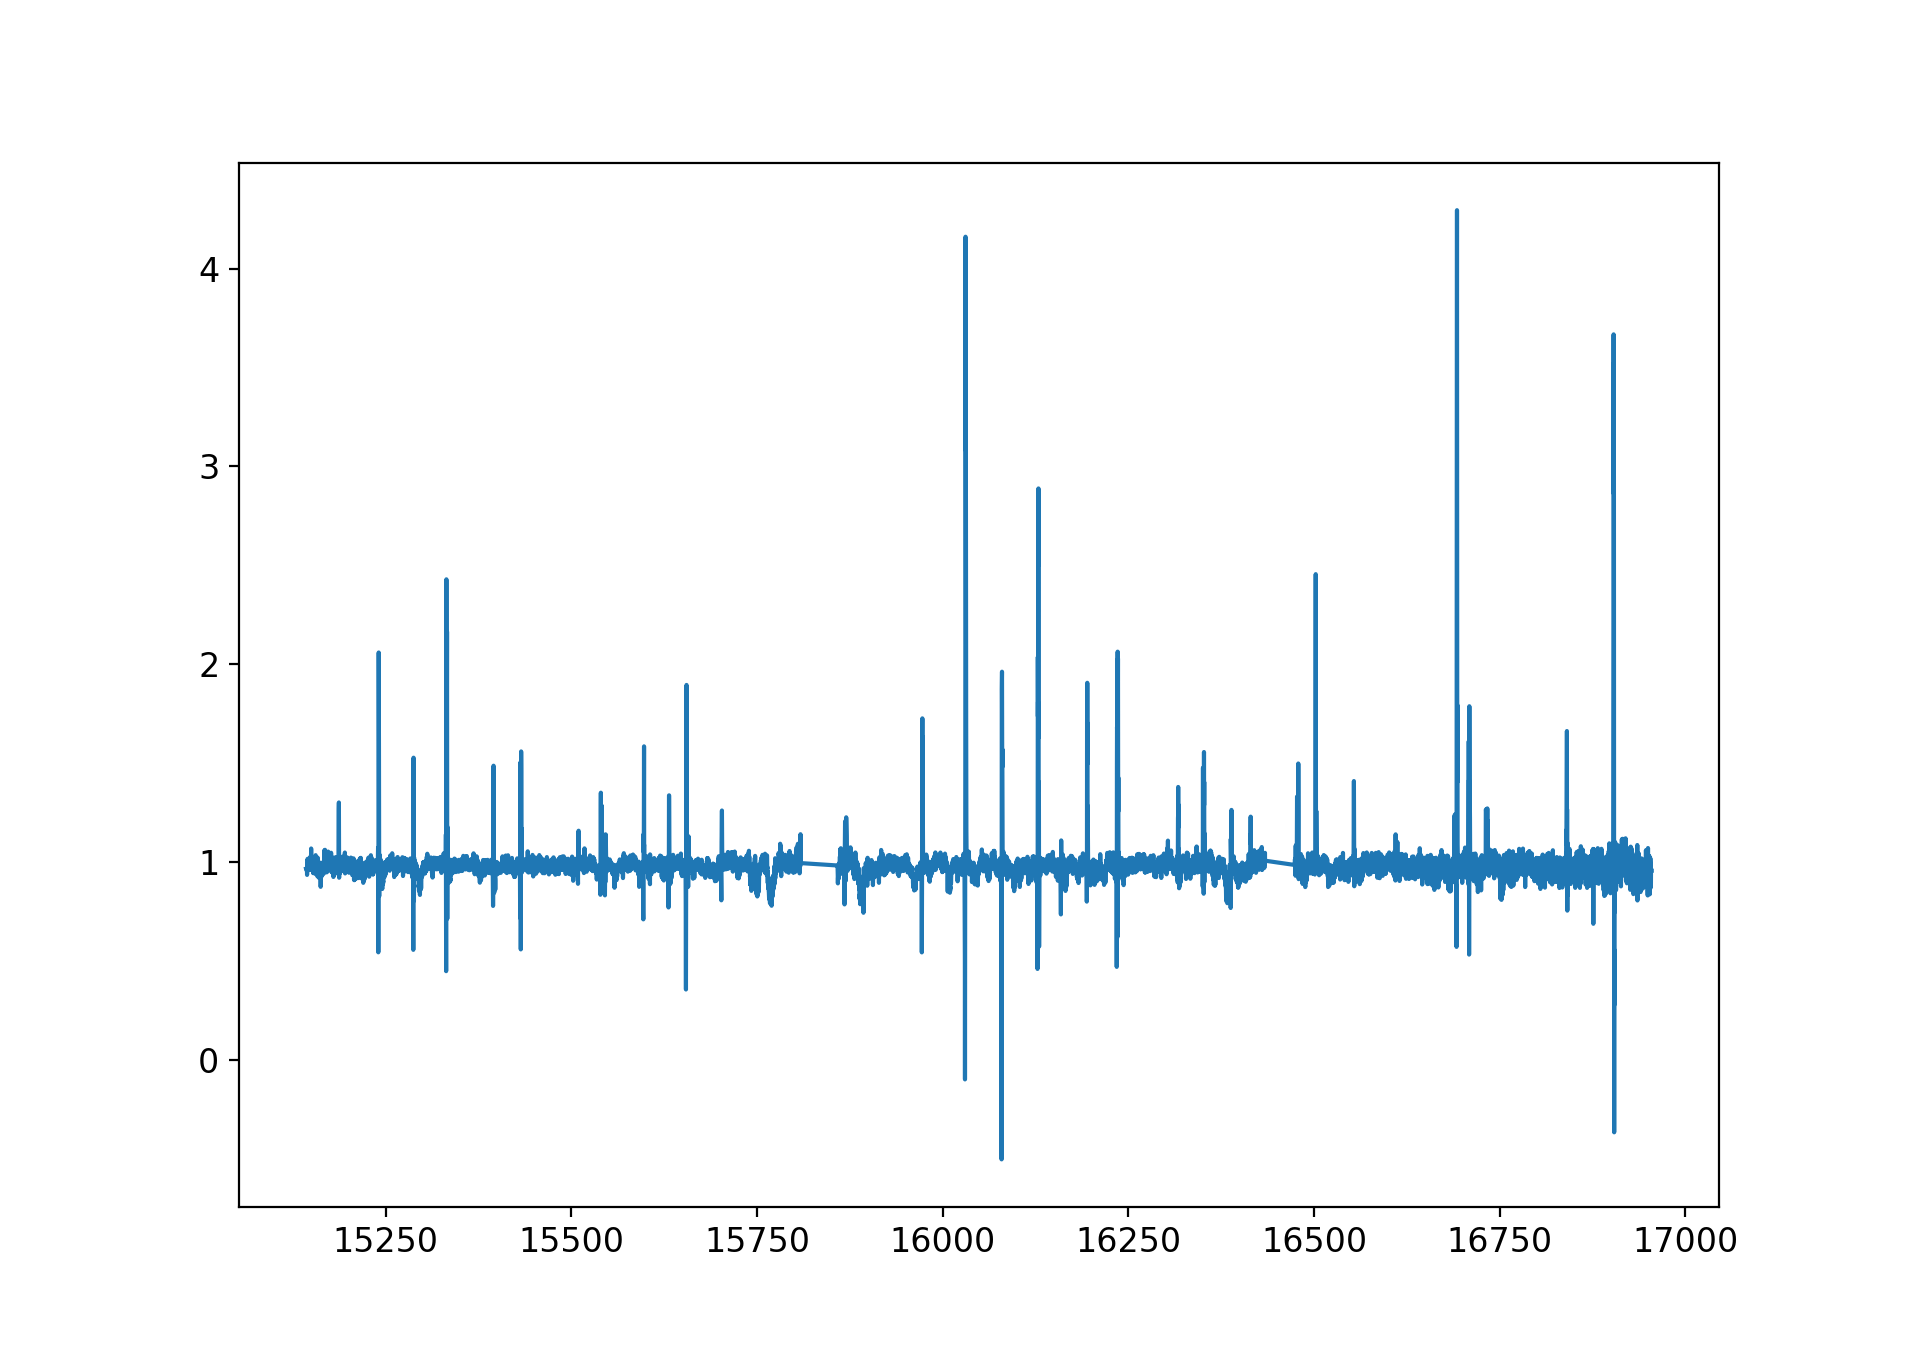

In [25]:
plt.plot(wave, specnorm)